# Introduction to Machine Learning with `scikit-learn I`

## <img src='https://az712634.vo.msecnd.net/notebooks/python_course/v1/robotguy.png' alt="Smiley face" width="42" height="42" align="left">Learning Objectives
* * *
* Go through a crash course in ML and get a high-level understanding of `scikit-learn` module
* See how to visualize and explore a built-in dataset (no need to collect data this time)
* Get introduced to some dimensionality reduction tranformations (no need to clean data this time)

<br><br>Here's my hand-drawn diagram of the machine learning process from which we will roughly follow in the Machine Learning modules.<br>

<img src='https://raw.githubusercontent.com/PythonWorkshop/intro-to-sklearn/master/imgs/ml_process_by_micheleenharris.png' alt="Smiley face" width="550">


## A very brief introduction to scikit-learn (aka `sklearn`)

As a gentle intro, it is helpful to think of the `sklearn` approach having layers of abstraction.  This famous quote certainly applies:

> Easy reading is damn hard writing, and vice versa. <br>
--Nathaniel Hawthorne

In `sklearn`, you'll find you have a common programming choice: to do things very explicitly, e.g. pre-process data one step at a time, perhaps do a transformation like PCA, split data into traning and test sets, define a classifier or learner with desired parameters, train the classifier, use the classifier to predict on a test set and then analyze how good it did.  

A different approach and something `sklearn` offers is to combine some or all of the steps above into a pipeline so to speak.  For instance, one could define a pipeline which does all of these steps at one time and perhaps even pits mutlple learners against one another or does some parameter tuning with a grid search (examples will be shown towards the end).  This is what is meant here by layers of abstraction.

So, in this particular module, for the most part, we will try to be explicit regarding our process and give some useful tips on options for a more automated or pipelined approach.  Just note, once you've mastered the explicit approaches you might want to explore `sklearn`'s `GridSearchCV` and `Pipeline` classes.

### `sklearn`'s way of algorithms

Here is `sklearn`'s algorithm diagram - (note, this is not an exhaustive list of model options offered in `sklearn`, but serves as a good algorithm guide).  The interactive version is [here](http://scikit-learn.org/stable/tutorial/machine_learning_map/).
![sklearn's ML map](https://az712634.vo.msecnd.net/notebooks/python_course/v1/ml_map.png)

As far as algorithms for learning a model (i.e. running some training data through an algorithm), it's nice to think of them in two different ways (with the help of the [machine learning wikipedia article](https://en.wikipedia.org/wiki/Machine_learning)).  

The first way of thinking about ML, is by the type of information or **<i>input</i>** given to a system.  So, given that criteria there are three classical categories:
1.  Supervised learning - we get the data and the labels
2.  Unsupervised learning - only get the data (no labels)
3.  Reinforcement learning - reward/penalty based information (feedback)

Another way of categorizing ML approaches, is to think of the desired **<i>output</i>**:
1.  Classification
2.  Regression
3.  Clustering
4.  Density estimation
5.  Dimensionality reduction

This second approach (by desired <i>output</i>) is how `sklearn` categorizes it's ML algorithms.<br><br>


### The problem solved in supervised learning (e.g. classification, regression)

Supervised learning consists in learning the link between two datasets: the **observed data X** and an **external variable y** that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.

All supervised estimators in `sklearn` implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations X, returns the predicted labels y.

Common algorithms you will use to train a model and then use trying to predict the labels of unknown observations are: <b>classification</b> and <b>regression</b>.  There are many types of classification and regression (for examples check out the `sklearn` algorithm cheatsheet below).

### The problem solved in <i>un</i>supervised learning (e.g. dimensionality reduction, clustering)

In machine learning, the problem of unsupervised learning is that of trying to find <b>hidden structure</b> in unlabeled data.

Unsupervised models have a `fit()`, `transform()` and/or `fit_transform()` in `sklearn`.

### There are some instances where ML is just not needed or appropriate for solving a problem.
Some examples are pattern matching (e.g. regex), group-by and data mining in general (discovery vs. prediction).

> <b>ML TIP:  ML can only answer 5 questions:</b>
* How much/how many?
* Which category?
* Which group?
* Is it weird?
* Which action?

<p style="text-align:right"><i>explained well by Brandon Rohrer [here]((https://channel9.msdn.com/blogs/Cloud-and-Enterprise-Premium/Data-Science-for-Rest-of-Us)</i></p>


#### EXERCISE: Should I use ML or can I get away with something else?

* Looking back at previous years, by what percent did housing prices increase over each decade?<br>
* Looking back at previous years, and given the relationship between housing prices and mean income in my area, given my income how much will a house be in two years in my area?<br>
* A vacuum like roomba has to make a decision to vacuum the living room again or return to its base.<br>
* Is this image a cat or dog?<br>
* Are orange tabby cats more common than other breeds in Austin, Texas?<br>
* Using my database on housing prices, group my housing prices by whether or not the house is under 10 miles from a school.<br>
* What is the weather going to be like tomorrow?<br>
* What is the purpose of life?

### Your first model - a quick example
* This model is an illustration of the patterns you will encounter in `sklearn`
* Just for fun, we'll perform a multiclass logistic regression on the `iris` dataset
* `sklearn` comes with many datasets ready-to-go for `sklearn`'s algorithms like the `iris` data set
* In the next part of this module we'll explore the `iris` dataset in detail
---
Below, notice some methods like *`fit`, `predict` and `predict_proba`*.  Many of the classifiers you'll see will share method names like these.  (Note this is a supervised learning classifier)

In [1]:
# Familiar imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn import datasets

# Other datasets in sklearn have similar "load" functions
iris = datasets.load_iris()

# Leave one value out from training set - that will be test later on
X_train, y_train = iris.data[:-1,:], iris.target[:-1]

In [3]:
from sklearn.linear_model import LogisticRegression

# Our model - a multiclass regression
# FIRST we initialize it with default params or specify some
logistic = LogisticRegression()

# Train on iris training set
# SECOND we give the model some training data
logistic.fit(X_train, y_train)

# Place data in array of arrays (1D array -> 2D array w/ 1 row)
X_test = iris.data[-1,:].reshape(1, -1) # this reshape figures out how many columns

# THIRD we give our model some test data and predict something
y_predict = logistic.predict(X_test)

In [4]:
print('Predicted class %s, real class %s' % (
        y_predict, iris.target[-1]))

Predicted class [2], real class 2


In [5]:
print('Probabilities of membership in each class: %s' % 
      logistic.predict_proba(X_test))

Probabilities of membership in each class: [[ 0.00168787  0.28720074  0.71111138]]


In [6]:
print('Coefs: %s' % 
      logistic.coef_)

Coefs: [[ 0.41446717  1.46158453 -2.26121553 -1.02854549]
 [ 0.38784687 -1.57084189  0.59710154 -1.38552729]
 [-1.67815808 -1.55504133  2.44674769  2.54807387]]


**Separate steps we saw:** 1) Initialize model with desired parameters, 2) train model, 3) predict something with model, 4) view some attributes of model prediction using a test set.

Generalized linear models in `sklearn` have these attributes the very least:
* `fit` and `predict`
* `coef_` and `intercept_`
* methods or attributes individual to the model (such as `predict_proba()` above)

QUICK QUESTION:
* What would have been good to do before plunging right in to a logistic regression model?

EXERCISE 1:  Follow the general pattern

* Using a toy dataset (below) run through a similar process with a Ridge Regressor.  For example:

```python
import numpy as np
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.5)

# 1 feature, 10 samples
data = np.array(sorted(np.random.randint(1, 10, size = 10)))
targets = sorted(np.random.randint(1, 10, size = 10))

```

* Create your own test data, based on what you determine training data, X, to be.
* What do coefficients mean here (`coef_`)? - remember how to get help on a method or attribute
* Remember how to create a scatter plot of the original data?  Don't forget plot import:
```python
%matplotlib inline
import matplotlib.pyplot as plt
```

SOLUTION 1

## (Collect Data), Visualize and Explore
* Well, the collection has already been done for us and this dataset is included with `sklearn`
* In reality, many datasets will need to go through a preprocessing and exploratory data analysis step.  `pandas` and `sklearn` have many tools for this.

### The Dataset - Fisher's Irises

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `n_samples x n_features`.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.<br><br>

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays.

If there are labels or targets, they need to be stored in **one-dimensional arrays or lists**.

Today we are going to use the <b>`iris`</b> dataset which comes with `sklearn`.  It's fairly small as we'll see shortly.

> <b>Remember our ML TIP:  Ask sharp questions.</b><br><br>e.g. What type of flower is this (pictured below) closest to of the three given classes?

<img border="0" alt="iris species" src="https://az712634.vo.msecnd.net/notebooks/python_course/v1/iris-setosa.jpg" width="200">
<p align="right">from http://www.madlantern.com/photography/wild-iris</p>

### Labels (species names/classes):
<img border="0" alt="iris species" src="https://az712634.vo.msecnd.net/notebooks/python_course/v1/irises.png" width="500" height="500">

TIP: Commonly, machine learning algorithms will require your data to be standardized or normalized.  In `sklearn` the data must also take on a certain structure.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

QUICK QUESTION:
1.  What do you expect this data set to be if you are trying to recognize an iris species?
* For our `[n_samples x n_features]` data array, what do you think
    * the samples are?
    * the features are?

Modify the following code in a new code cell below to understand types found in this dataset.
```python
from sklearn import datasets

# Load data
iris = datasets.___()

# Check type of data matrix.  fill in the blank
print(type(iris.___))

# Check type of target array.  fill in the blank
print(type(iris.___))

# What other types can we use for the target labels?
```

In [ ]:
# Try here

#### Features (aka columns in data)

In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

# Converting to dataframe for nice printing and use the "feature_names" attribute

pd.DataFrame({'feature name': iris.feature_names})

#### Targets (aka labels)

In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

# Converting to dataframe for clearer printing
pd.DataFrame({'target name': iris.target_names})

> `sklearn` TIP: all included datasets for have at least `feature_names` and sometimes `target_names`

### Get to know the data - explore
* Features (columns/measurements) are depicted in this diagram:
<img border="0" alt="iris data features" src="https://az712634.vo.msecnd.net/notebooks/python_course/v1/iris_petal_sepal.png" width="200" height="200">

Next, let's explore:
* Shape
* The actual data
* Summaries

<b>Shape and representation<b>

In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

# How many data points (rows) x how many features (columns)
print(iris.data.shape)
print(iris.target.shape)

<b>Sneak a peek at data (and a reminder of your `pandas` dataframe methods)<b>

Target names are in **dataset.target_names**.  For nice printing (and actual useful methods), we can convert to a `pandas` data frame.  Fill in the following blanks:

In [ ]:
# Convert to pandas df (adding real column names) to use some pandas functions (head, describe...)
iris.df = pd.DataFrame(iris.data, 
                       columns = iris.feature_names)


# First few rows
iris.df.head()

<b>Summary statitsics<b>
* use `describe` method

In [ ]:
# Summary stats
iris.df.describe()

* We don't have to do much with the `iris` dataset.  It has no missing values.  It's already in numpy arrays and has the correct shape for `sklearn`.  However we could try <b>standardization</b> and/or <b>normalization</b>. (later, we will show one-hot-encoding)

## Visualize
* There are many ways to visualize and here's a simple one:

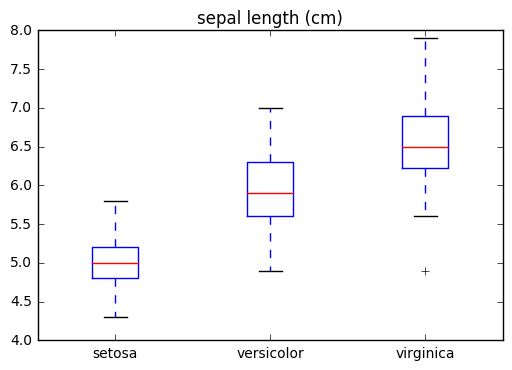

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

iris.df = pd.DataFrame(iris.data, 
                       columns = iris.feature_names)

iris.df['target'] = iris.target

# A bit of rearrangement for plotting
df = iris.df.loc[:, ['sepal length (cm)', 'target']]

# Add an index column which indicates index within a class
df['idx'] = list(range(0, 50)) * 3

# Rearrange to be rows of class values rather feature values for a sample
df = df.pivot(index = 'idx', columns = 'target')

# Convert back to an array
df = np.array(df)

# Plot a boxplot!
plt.boxplot(df, labels = iris.target_names)
plt.title('sepal length (cm)')

**Using `pairplot` from `seaborn` is a quick way to see which features separate out our data**

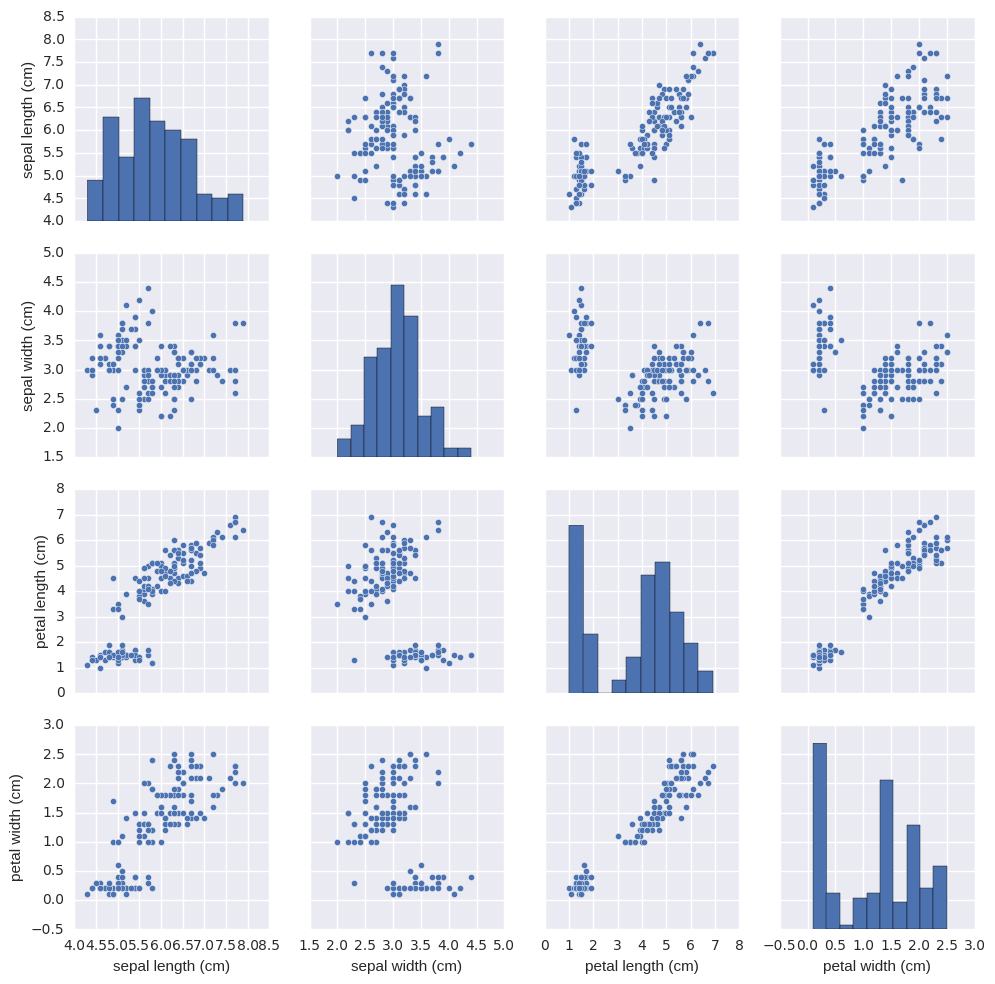

In [8]:
import seaborn as sb
sb.pairplot(pd.DataFrame(iris.data, columns = iris.feature_names))

<p>What you might have to do before using a learner in `sklearn`:</p>
1. Non-numerics transformed to numeric (tip: use applymap() method from `pandas`)
* Fill in missing values
* Standardization
* Normalization
* Encoding categorical features (e.g. one-hot encoding or dummy variables)


### Preprocessing (Bonus Material)

<b>Features should end up in a numpy.ndarray (hence numeric) and labels in a list or numpy array.</b>

Data options:
* Use pre-processed [datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) from scikit-learn
* [Create your own](http://scikit-learn.org/stable/datasets/index.html#sample-generators)
* Read from a file

If you use your own data or "real-world" data you will likely have to do some data wrangling and need to leverage `pandas` for some data manipulation.

#### Standardization - make our data look like a standard Gaussian distribution (commonly needed for `sklearn` learners)

> FYI: you'll commonly see the data or feature set (ML word for data without it's labels) represented as a capital <b>X</b> and the targets or labels (if we have them) represented as a lowercase <b>y</b>.  This is because the data is a 2D array or list of lists and the targets are a 1D array or simple list.

In [9]:
# Standardization aka scaling
from sklearn import preprocessing, datasets

# Make sure we have iris loaded
iris = datasets.load_iris()


# Data and labels (target)
X, y = iris.data, iris.target

# Scale it to a gaussian distribution
X_scaled = preprocessing.scale(X)

# How does it look now
pd.DataFrame(X_scaled).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [10]:
# let's just confirm our standardization worked (mean is 0 w/ unit variance)
pd.DataFrame(X_scaled).describe()

# Also could:
#print(X_scaled.mean(axis = 0))
#print(X_scaled.std(axis = 0))

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


> PRO TIP: To save our standardization and reapply later (say to the test set or some new data), create a transformer object like so:

```python

# Standardize through scaling
scaler = preprocessing.StandardScaler().fit(X_train)

# Apply to a new dataset (e.g. test set):
scaler.transform(X_test)
```

#### Normalization - scaling samples <i>individually</i> to have unit norm (vector length)
* This type of scaling is really important if doing some downstream transformations and learning (see sklearn docs [here](http://scikit-learn.org/stable/modules/preprocessing.html#normalization) for more) where similarity of pairs of samples is examined
* A basic intro to normalization and the unit vector can be found [here](http://freetext.org/Introduction_to_Linear_Algebra/Basic_Vector_Operations/Normalization/)

In [ ]:
# Normalization aka scaling individually to unit norm
from sklearn import preprocessing, datasets

# Make sure we have iris loaded
iris = datasets.load_iris()

# What do we call these variables normally? (standard practice-wise)
___, ___ = iris.data, iris.target

# Scale it to a unit norm
X_norm = preprocessing.normalize(X, norm='l1')

# How does it look now
pd.DataFrame(X_norm).tail()

In [ ]:
from IPython.display import display_html

# let's just confirm our standardization worked (mean is 0 w/ unit variance)
display_html(pd.DataFrame(X_norm).describe())

# cumulative sum of normalized and original data: (uncomment to view)
# display_html(pd.DataFrame(X_norm.cumsum().reshape(X.shape)).tail())
# display_html(pd.DataFrame(X).cumsum().tail())

# unit norm (convert to unit vectors) - all row sums should be 1 now
X_norm.sum(axis = 1)

> PRO TIP: To save our normalization (like standardization above) and reapply later (say to the test set or some new data), create a transformer object like so:

```python
# Normalize to unit norm
normalizer = preprocessing.Normalizer().fit(X_train)

# Apply to a new dataset (e.g. test set):
normalizer.transform(X_test) 

```

##  (Clean Data) and Transform Data

### Make the learning easier or better  beforehand -  feature reduction/selection/creation
* SelectKBest
* PCA
* One-Hot Encoder

### Selecting k top scoring features (also dimensionality reduction)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# SelectKBest for selecting top-scoring features

from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2

iris = datasets.load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
print(X.shape)
df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# New feature is petal width / sepal width
df['petal width / sepal width'] = df['petal width (cm)'] / df['sepal width (cm)']

# Grab feature names + new one
new_feature_names = df.columns
print('New feature names:', list(new_feature_names))

# We've now added a new column to our data
X = np.array(df)

New feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'petal width / sepal width']


In [16]:
# Perform feature selection

#  Input is scoring function (here chi2) to get univariate p-values
#  and number of top-scoring features (k) - here we get the top 3
dim_red = SelectKBest(chi2, k = 3)

# Train
dim_red.fit(X, y)

# Use model to transform original data
X_t = dim_red.transform(X)

In [8]:
# Show scores, features selected and new shape
print('Scores:', dim_red.scores_)
print('New shape:', X_t.shape)

Scores: [  10.81782088    3.59449902  116.16984746   67.24482759]
New shape: (150, 3)


In [18]:
# Get back the selected columns
selected = dim_red.get_support()
selected_names = new_feature_names[selected]

print('Top k features: ', list(selected_names))

Top k features:  ['petal length (cm)', 'petal width (cm)', 'petal width / sepal width']


**Note on scoring function selection in `SelectKBest` tranformations:**
* For regression - [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
* For classification - [chi2](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)


### Principal component analysis (aka PCA)
* Reduces dimensions (number of features), based on what information explains the most variance (or signal)
* Considered unsupervised learning
* Useful for very large feature space (e.g. say the botanist in charge of the iris dataset measured 100 more parts of the flower and thus there were 104 columns instead of 4)
* More about PCA on wikipedia [here](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [19]:
# PCA for dimensionality reduction - Fill in the blanks

from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()

X, y = iris.data, iris.target

# Perform principal component analysis
# Selects the number of components such that the amount of variance 
#   that needs to be explained is greater than the percentage specified
pca = decomposition.PCA(0.95)
pca.fit(X)

# Apply pca to data - like SelectKBest above
X_t = pca.transform(X)

# Check the dimensions of the transformed data in X_t
X_t.shape

(150, 2)

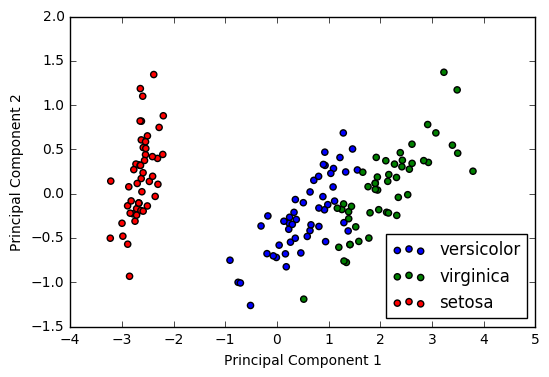

In [20]:
# Grab the first two principle components
x1, x2 = X_t[:, 0], X_t[:, 1]

#  (note: you can get the iris names below from iris.target_names, also in docs)
c1 = np.array(list('rbg')) # colors
colors = c1[y] # y coded by color
classes = iris.target_names[y] # y coded by iris name
for (i, cla) in enumerate(set(classes)):
    xc = [p for (j, p) in enumerate(x1) if classes[j] == cla]
    yc = [p for (j, p) in enumerate(x2) if classes[j] == cla]
    cols = [c for (j, c) in enumerate(colors) if classes[j] == cla]
    plt.scatter(xc, yc, c = cols, label = cla)
    plt.ylabel('Principal Component 2')
    plt.xlabel('Principal Component 1')
plt.legend(loc = 4)

### More feature selection methods [here](http://scikit-learn.org/stable/modules/feature_selection.html)

### One Hot Encoding
* It's an operation on feature labels - a method of dummying variable
* Expands the feature space by nature of transform - later this can be processed further with a dimensionality reduction (the dummied variables are now their own features)
* FYI:  One hot encoding variables is needed for python ML module `tenorflow`
* Can do this with `pandas` method or a `sklearn` one-hot-encoder system

#### `pandas` method

In [4]:
# Dummy variables with pandas built-in function

import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Convert to dataframe and add a column with iris species name
data = pd.DataFrame(X, columns = iris.feature_names)
data['target_name'] = iris.target_names[y]

df = pd.get_dummies(data, prefix = ['target_name'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name_setosa,target_name_versicolor,target_name_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


#### `sklearn` method

In [5]:
# OneHotEncoder for dummying variables

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# We encode both our categorical variable and it's labels
enc = OneHotEncoder()
label_enc = LabelEncoder() # remember the labels here

# Encode labels (can use for discrete numerical values as well)
data_label_encoded = label_enc.fit_transform(y)

# Encode and "dummy" variables
data_feature_one_hot_encoded = enc.fit_transform(y.reshape(-1, 1))
print(data_feature_one_hot_encoded.shape)

num_dummies = data_feature_one_hot_encoded.shape[1]
df = pd.DataFrame(data_feature_one_hot_encoded.toarray(), 
                  columns = label_enc.inverse_transform(range(num_dummies)))

df.head()

(150, 3)


,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016